# Analyse de l'incidence de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données sont récupérées sur le site web du réseau sentinelle. Les données recouvrent la période de 1991 à nos jours.

In [4]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

La première ligne est un commentaire, elle est skip

In [5]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202041          7   4094     1977    6211       6           3   
1     202040          7   2090      662    3518       3           1   
2     202039          7   1058      240    1876       2           1   
3     202038          7   2253      782    3724       3           1   
4     202037          7   1584      405    2763       2           0   
5     202036          7    919      100    1738       1           0   
6     202035          7    828        0    1694       1           0   
7     202034          7   2272      371    4173       3           0   
8     202033          7   1284      177    2391       2           0   
9     202032          7   2650      689    4611       4           1   
10    202031          7   1303      100    2506       2           0   
11    202030          7   1385       75    2695       2           0   
12    202029          7    841       10    1672       1           0   
13    202028          7    728        0    1515       1           0   
14    202027          7    986      149    1823       1           0   
15    202026          7    694        0    1454       1           0   
16    202025          7    228        0     597       0           0   
17    202024          7    388        0     959       1           0   
18    202023          7    558        1    1115       1           0   
19    202022          7    277        0     633       0           0   
20    202021          7    602       36    1168       1           0   
21    202020          7    824       20    1628       1           0   
22    202019          7    310        0     753       0           0   
23    202018          7    849       98    1600       1           0   
24    202017          7    272        0     658       0           0   
25    202016          7    758       78    1438       1           0   
26    202015          7   1918      675    3161       3           1   
27    202014          7   3879     2227    5531       6           3   
28    202013          7   7326     5236    9416      11           8   
29    202012          7   8123     5790   10456      12           8   
...      ...        ...    ...      ...     ...     ...         ...   
1528  199126          7  17608    11304   23912      31          20   
1529  199125          7  16169    10700   21638      28          18   
1530  199124          7  16171    10071   22271      28          17   
1531  199123          7  11947     7671   16223      21          13   
1532  199122          7  15452     9953   20951      27          17   
1533  199121          7  14903     8975   20831      26          16   
1534  199120          7  19053    12742   25364      34          23   
1535  199119          7  16739    11246   22232      29          19   
1536  199118          7  21385    13882   28888      38          25   
1537  199117          7  13462     8877   18047      24          16   
1538  199116          7  14857    10068   19646      26          18   
1539  199115          7  13975     9781   18169      25          18   
1540  199114          7  12265     7684   16846      22          14   
1541  199113          7   9567     6041   13093      17          11   
1542  199112          7  10864     7331   14397      19          13   
1543  199111          7  15574    11184   19964      27          19   
1544  199110          7  16643    11372   21914      29          20   
1545  199109          7  13741     8780   18702      24          15   
1546  199108          7  13289     8813   17765      23          15   
1547  199107          7  12337     8077   16597      22          15   
1548  199106          7  10877     7013   14741      19          12   
1549  199105          7  10442     6544   14340      18          11   
1550  199104          7   7913     4563   11263      14           8   
1551  199103          7  15387    10484   20290      27          18   
1552  199102          7  16277  

On vérifie qu'il n'y a pas de données manquantes

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Aucune donnée n'est manquante, donc pas besoin de retirer des lignes.

Comme pour le cas de la grippe, il y a besoin de reformater les données qui ne sont pas dans un format standard interpretable par pandas. 

In [9]:
# ce code est repris tel quel de l'exemple du cours.
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

De même, nous réorganisons le jeu de données pour que l'index soit les dates, et qu'il soit trié par ordre chronologique.

In [10]:
sorted_data = raw_data.set_index('period').sort_index()

On visualise les données, avec un zoom sur les dernières années:

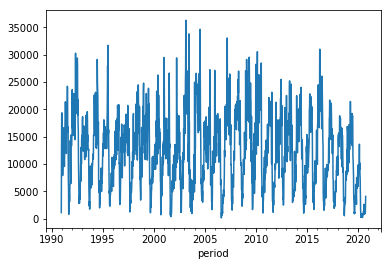

In [13]:
sorted_data['inc'].plot()

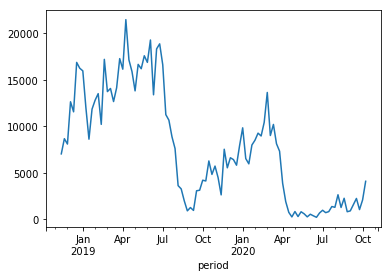

In [15]:
sorted_data['inc'][-100:].plot()

On constate que la periode creuse se situe en fin d'été

## Analyse statistique

Nous utilisons des periodes annuelles allant du 1er Septembre au 1er Septembre.

In [19]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Puis nous calculons les incidences annuelles en utilisant la même technique que pour les états gripaux

In [20]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

On a alors les incidences annuelles

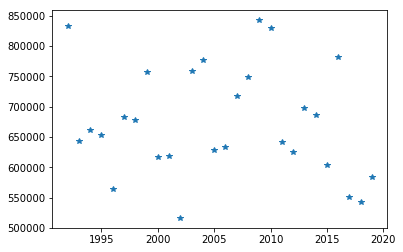

In [21]:
yearly_incidence.plot(style='*')

Et un histogramme:

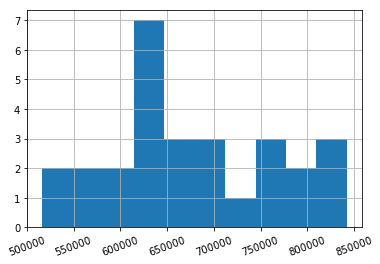

In [22]:
yearly_incidence.hist(xrot=20)